# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | harvest
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | okhotsk
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | basco
Processing Record 14 of Set 1 | vila franca do campo
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | dole
Processing Record 18 of Set 1 | campos do jordao
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | desnogorsk
Processing Rec

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,3.52,87,95,1.34,CL,1683755188
1,stanley,54.8680,-1.6985,11.05,87,20,2.06,GB,1683755287
2,minas de marcona,-15.2119,-75.1103,18.23,68,0,5.33,PE,1683755287
3,tiksi,71.6872,128.8694,-13.19,83,23,6.12,RU,1683755287
4,ancud,-41.8697,-73.8203,12.60,96,100,3.42,CL,1683755288


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.52,87,95,1.34,CL,1683755188
1,stanley,54.8680,-1.6985,11.05,87,20,2.06,GB,1683755287
2,minas de marcona,-15.2119,-75.1103,18.23,68,0,5.33,PE,1683755287
3,tiksi,71.6872,128.8694,-13.19,83,23,6.12,RU,1683755287
4,ancud,-41.8697,-73.8203,12.60,96,100,3.42,CL,1683755288


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

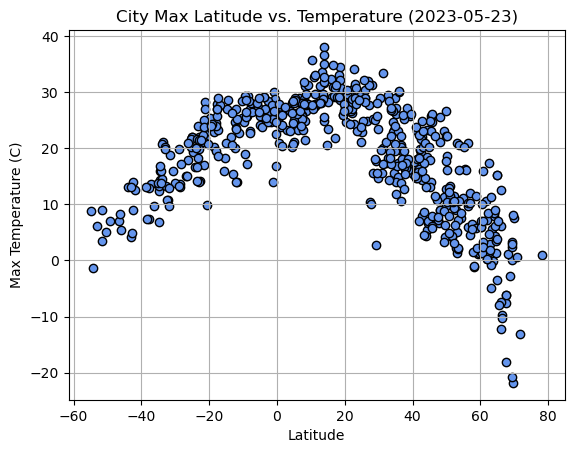

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o", facecolors="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

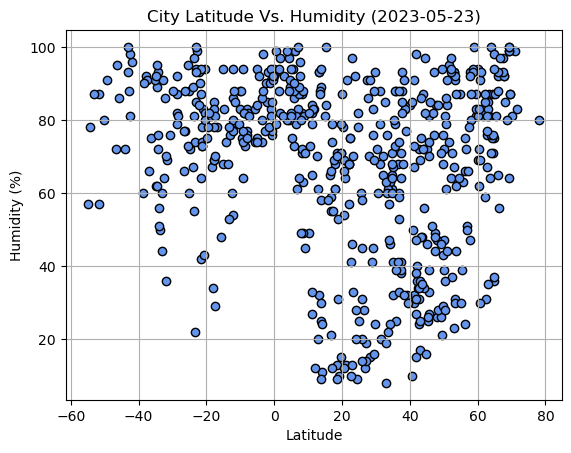

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o", facecolors="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude Vs. Humidity (2023-05-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

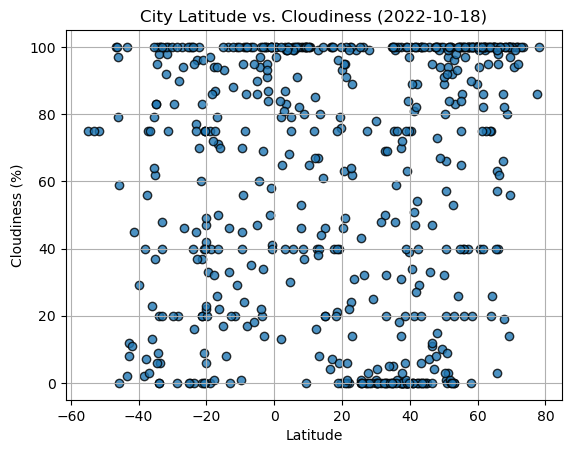

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o", facecolors="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(' City Latitude Vs. Cloudiness (2023-05-10)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness Percentage')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

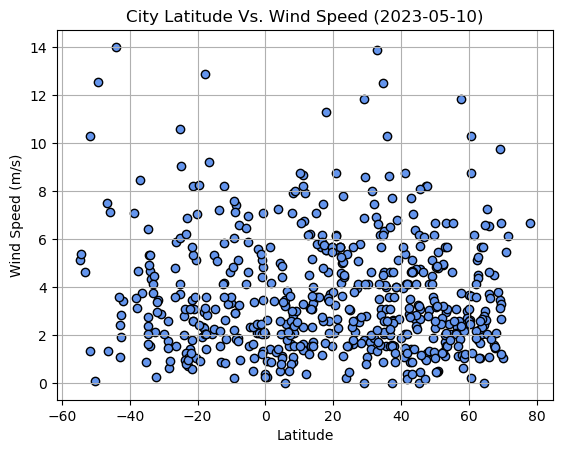

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o", facecolors="cornflowerblue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude Vs. Wind Speed (2023-05-10)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: 0.16
The r-value is: 0.03
The r-value is: 0.00
The r-value is: 0.00


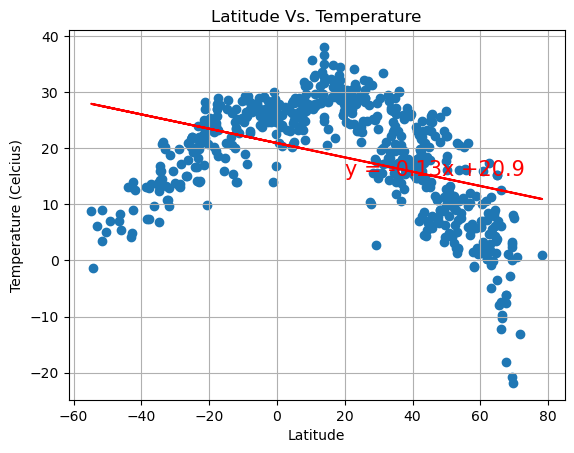

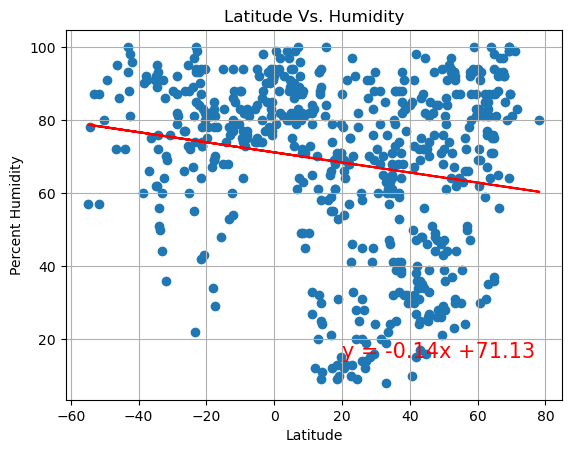

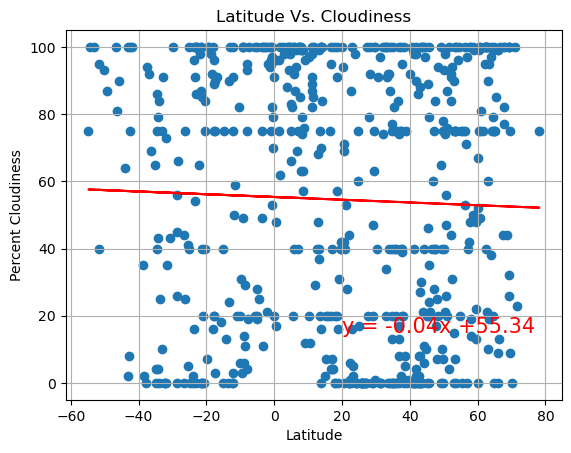

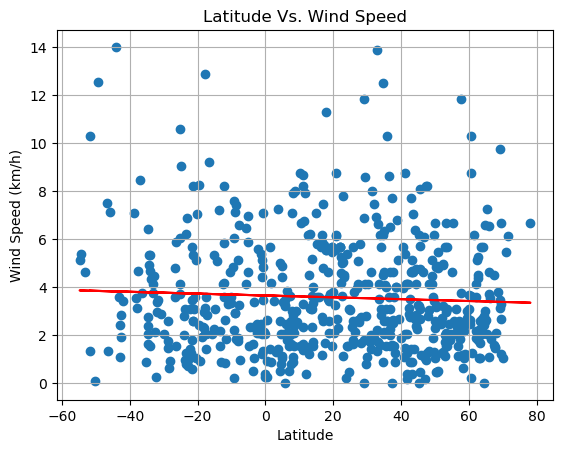

In [26]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = [city_data_df['Max Temp'], city_data_df['Humidity'],city_data_df['Cloudiness'], city_data_df['Wind Speed']]
ylabel = ['Temperature (Celcius)', 'Percent Humidity', 'Percent Cloudiness', 'Wind Speed (km/h)']
title = ['Latitude Vs. Temperature', 'Latitude Vs. Humidity', 'Latitude Vs. Cloudiness', 'Latitude Vs. Wind Speed']

for i in range(len(y_values)):
    def line_regress(x_values, y_values):
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[i])
        regress_values = x_values * slope + intercept
        
        fig, ax = plt.subplots()
        plt.scatter(x_values, y_values[i], marker='o')
        plt.plot(x_values, regress_values, "r-")
        line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
        plt.title(title[i])
        plt.xlabel('Latitude')
        plt.ylabel(ylabel[i])
        plt.grid(True)
        plt.annotate(line_eq,(20,15),fontsize=15,color="red")
        
        print(f"The r-value is: {rvalue**2:.2f}")
        
    line_regress(x_values, y_values)

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,11.05,87,20,2.06,GB,1683755287
3,tiksi,71.6872,128.8694,-13.19,83,23,6.12,RU,1683755287
5,ilulissat,69.2167,-51.1000,0.01,64,32,9.77,GL,1683755152
6,harvest,34.8556,-86.7508,28.97,61,40,0.89,US,1683755288
7,colonia,50.9333,6.9500,13.23,84,20,0.51,DE,1683755064


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,3.52,87,95,1.34,CL,1683755188
2,minas de marcona,-15.2119,-75.1103,18.23,68,0,5.33,PE,1683755287
4,ancud,-41.8697,-73.8203,12.60,96,100,3.42,CL,1683755288
11,waitangi,-43.9535,-176.5597,13.04,72,64,14.02,NZ,1683755291
15,port-aux-francais,-49.3500,70.2167,7.09,91,87,12.56,TF,1683755292


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6693302531492942


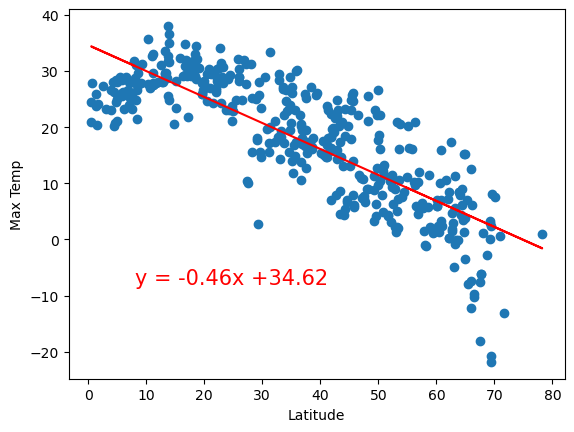

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(8,-8),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")


print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.6762168295342595


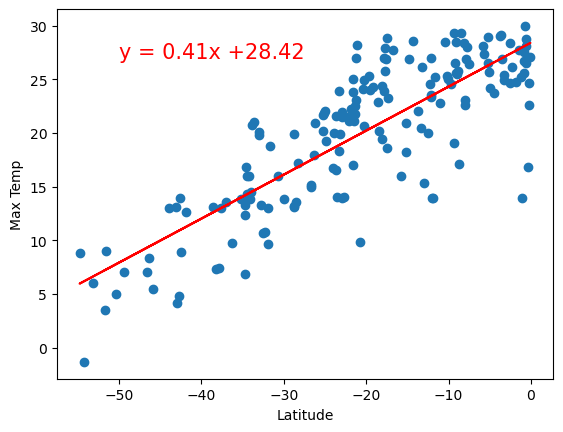

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,27),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cities near the equator seem to have higher temperatures. As the distance increases from the equator, on both northern and souther hemispheres, the max temperature starts to go down. The r-value for both northern and southern hemispheres show a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.004457199049851692


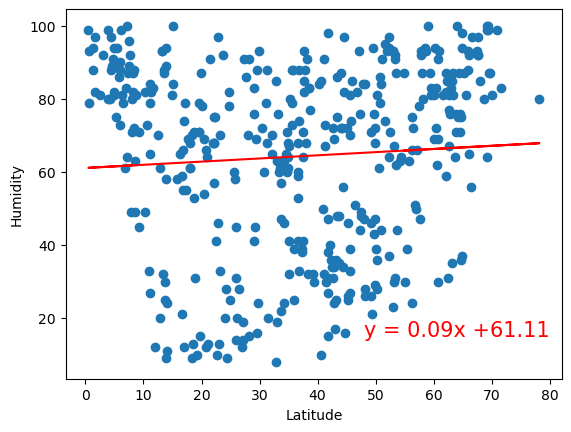

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(48,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")


print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.009869876280102824


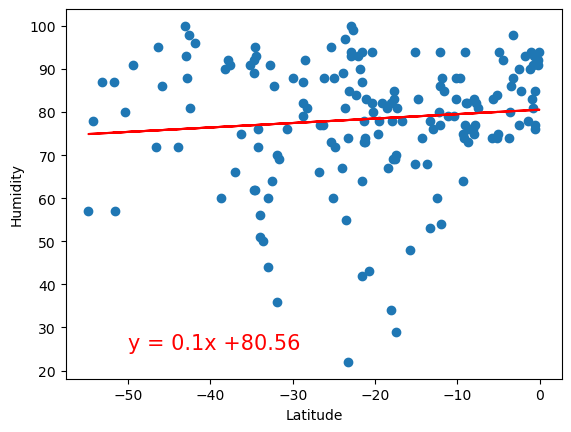

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")


print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Both hemispheres do not show a strong correlation as seen on the r-value and lineear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0007186894703991115


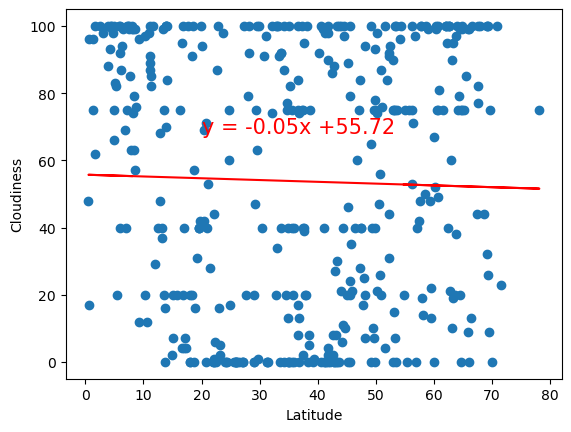

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(20,68),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0005224994571324554


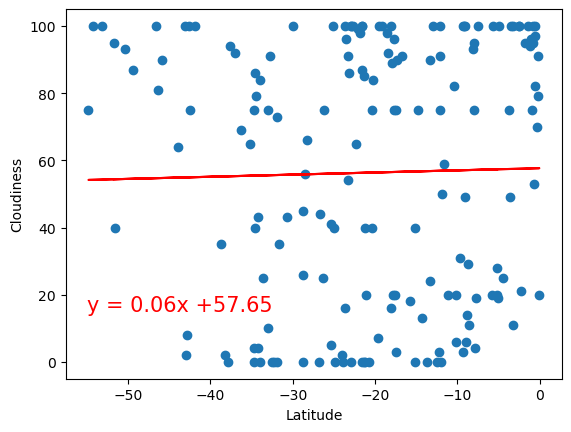

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cloudiness and latitude do not ahve a strong correlation as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009021980670150202


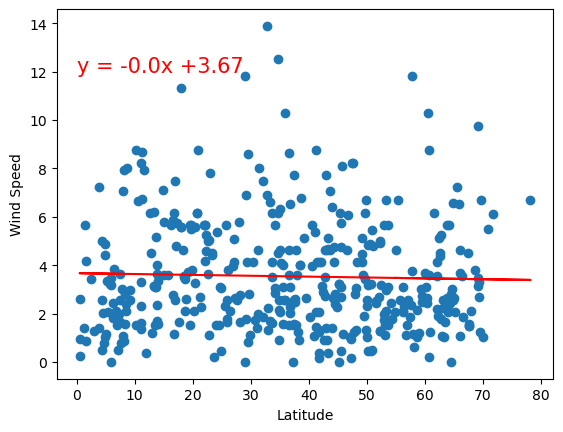

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.021296578152098487


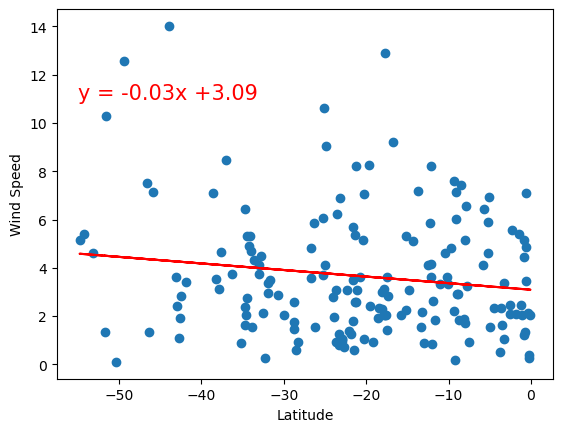

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Wind Speed and latitude does not really have a strong correlation as well.